In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
#read the dataset
df=pd.read_csv('Admission_Predict (1).csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [134]:
#check the null values
df.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
#check the datatypes
df.dtypes


Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
#evaluate the columns
df.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
df.drop('Serial No.',axis=1,inplace=True)

In [15]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [17]:
columns_names=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']

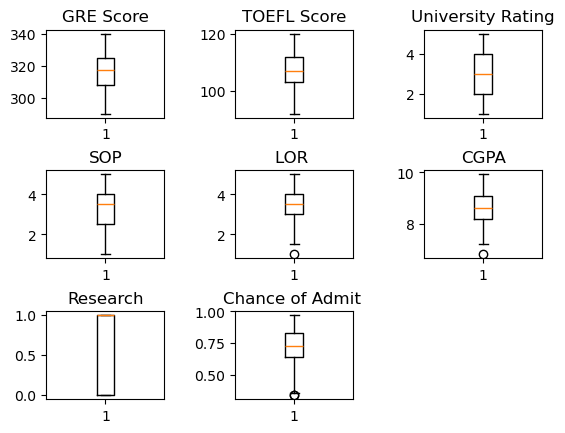

In [19]:
#boxplot
i=1
for col in columns_names:
    plt.subplots_adjust(wspace=0.60,hspace=0.6)
    plt.subplot(3,3,i)
    plt.boxplot(df[col])
    plt.title(col)
    i=i+1

In [21]:
#removing the outliers
outlier_columns=['LOR ', 'CGPA','Chance of Admit ']

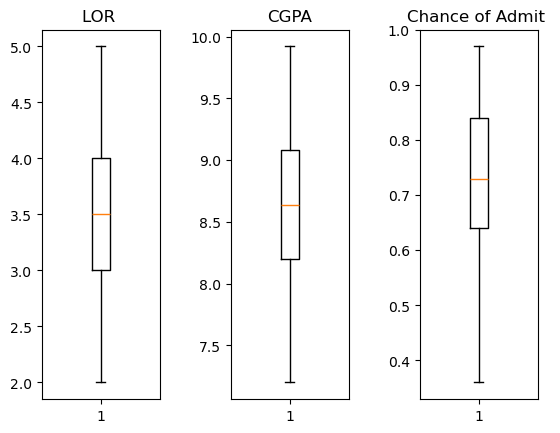

In [150]:
i=1
for col in outlier_columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    upper_index=np.where(df[col]>=upper)[0]
    lower_index=np.where(df[col]<=lower)[0]
    df.drop(index=upper_index,inplace=True)
    df.drop(index=lower_index,inplace=True)
    
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(1,3,i)
    i=i+1
    plt.boxplot(df[col])
    plt.title(col)
    df.reset_index(inplace=True)
    df.drop('index',axis=1,inplace=True)

    
    

In [170]:
df_cor=df.corr()

In [158]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

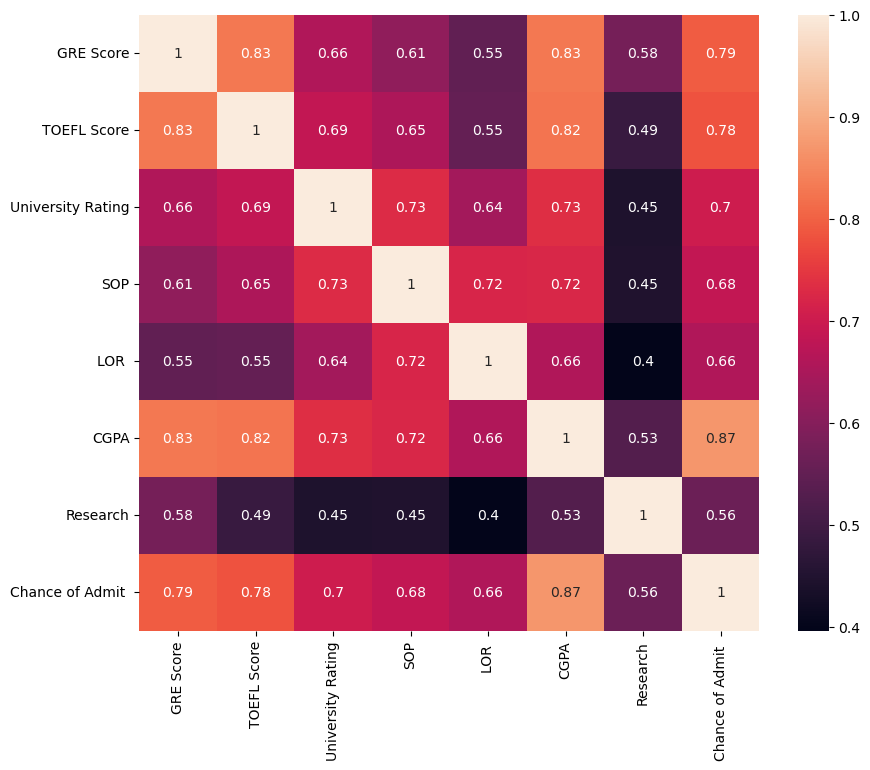

In [172]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cor,annot=True)
plt.show

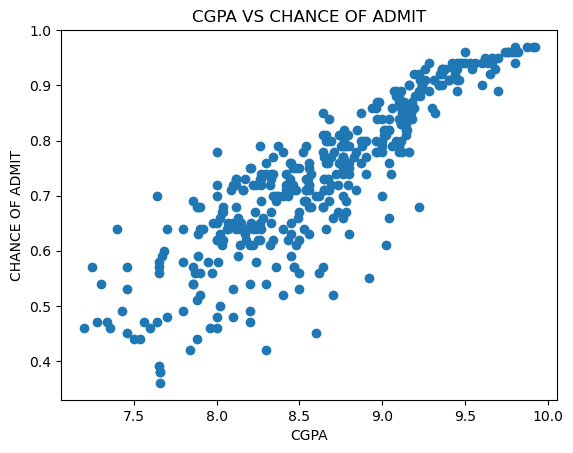

In [176]:
plt.scatter(x=df['CGPA'],y=df['Chance of Admit '])


plt.title('CGPA VS CHANCE OF ADMIT')
plt.xlabel('CGPA')
plt.ylabel('CHANCE OF ADMIT')


plt.show()

In [178]:
df.shape

(389, 8)

In [180]:
#model creation

In [186]:
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [188]:
print(x)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
384        324          110                  3  3.5   3.5  9.04         1
385        325          107                  3  3.0   3.5  9.11         1
386        330          116                  4  5.0   4.5  9.45         1
387        312          103                  3  3.5   4.0  8.78         0
388        333          117                  4  5.0   4.0  9.66         1

[389 rows x 7 columns]


In [208]:
#spliting the train and test dataset

In [210]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=120)


In [212]:
xtrain.shape

(311, 7)

In [214]:
xtest.shape

(78, 7)

In [222]:
from sklearn.linear_model import LinearRegression

In [226]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [228]:
model.coef_

array([ 0.00127363,  0.00205888,  0.00488978, -0.00434849,  0.02498325,
        0.13043445,  0.02837703])

In [230]:
model.intercept_

-1.123741283213639

In [232]:
#training score

In [234]:
model.score(xtrain,ytrain)

0.7935905556111562

In [236]:
model.score(xtest,ytest)

0.8036089388919481

In [238]:
y_pred=model.predict(xtest)

In [244]:
pd.DataFrame({'True values':ytest,'predicted values':y_pred})

,True values,predicted values
99,0.57,0.689046
280,0.89,0.851479
12,0.62,0.635758
34,0.88,0.866293
172,0.90,0.875861
...,...,...
302,0.70,0.696038
122,0.85,0.836545
145,0.79,0.665873
36,0.58,0.542425


In [23]:
#check the errors
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [256]:
mean_absolute_error(ytest,y_pred)

0.044868869477113694

In [268]:
mean_squared_error(ytest,y_pred)

0.003942647391517864

In [270]:
#prediction

In [272]:
model.predict([[270,98,2,3,3,7,1]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.43501007])

In [276]:
model.predict([[340,98,4,5,4,9,1]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.81109861])

In [278]:
#saving the model

In [280]:
import joblib

In [282]:
joblib.dump(model,'Irmodel')


['Irmodel']

In [286]:
model_reloaded=joblib.load('Irmodel')

In [290]:
model_reloaded.predict([[300,120,4.5,4,4,9,1]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.81224234])